In [23]:
import numpy as np
import tensorflow as tf
import pickle
import scipy.io
import idx2numpy
import random
from matplotlib import pyplot as plt
import math
from PIL import Image
from matplotlib.pyplot import imshow

In [2]:
pickle_file = 'SVHN_multi.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    svhn_train_dataset = save['train_dataset']
    svhn_train_labels = save['train_labels']
    svhn_valid_dataset = save['valid_dataset']
    svhn_valid_labels = save['valid_labels']
    svhn_test_dataset = save['test_dataset']
    svhn_test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', svhn_train_dataset.shape, svhn_train_labels.shape)
    print('Validation set', svhn_valid_dataset.shape, svhn_valid_labels.shape)
    print('Test set', svhn_test_dataset.shape, svhn_test_labels.shape)

('Training set', (230069, 32, 32, 1), (230069, 6))
('Validation set', (5684, 32, 32, 1), (5684, 6))
('Test set', (13068, 32, 32, 1), (13068, 6))


In [3]:
svhn_train_labels = (svhn_train_labels.astype(np.int32))
svhn_test_labels = (svhn_test_labels.astype(np.int32))
svhn_valid_labels = (svhn_valid_labels.astype(np.int32))

In [4]:
def plot_img(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [6]:
svhn_test_dataset[0].shape

(32, 32, 1)

In [32]:
# img = Image.fromarray(svhn_test_dataset[0], 'RGB')
img = Image.fromarray(svhn_test_dataset[10], 'RGBA')
img.show()
# imshow(np.asarray(img))

In [25]:
imshow(img)

In [16]:
one = np.copy(svhn_test_dataset[10])
one.shape

(32, 32, 1)

In [17]:
one = one.reshape(one.shape[:2]) 

In [18]:
one.shape

(32, 32)

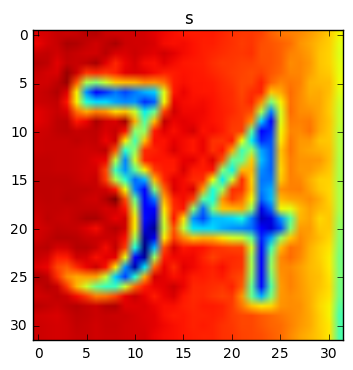

In [19]:
plot_img(one, 's')

In [5]:
plot_img(svhn_test_dataset[0],'1')

TypeError: Invalid dimensions for image data

In [5]:
print(svhn_train_dataset.dtype, svhn_train_labels.dtype)
print(svhn_test_dataset.dtype, svhn_test_labels.dtype)
print(svhn_valid_dataset.dtype, svhn_valid_labels.dtype)

(dtype('float32'), dtype('int32'))
(dtype('float32'), dtype('int32'))
(dtype('float32'), dtype('int32'))


In [6]:
train = scipy.io.loadmat('mnist_multi_train_28x140.mat')
test = scipy.io.loadmat('mnist_multi_test_28x140.mat')

In [7]:
train_labels = train['y']
train_data = train['X']

test_labels = test['y']
test_data = test['X']

In [8]:
print(train_data.shape, train_labels.shape)
print(test_data.shape, test_labels.shape)

((80000, 28, 140, 1), (80000, 6))
((10000, 28, 140, 1), (10000, 6))


In [9]:
train_labels = (train_labels.astype(np.int32))
test_labels = (test_labels.astype(np.int32))
test_data = (test_data.astype(np.float32))
train_data = (train_data.astype(np.float32))

In [10]:
print(train_data.dtype, train_labels.dtype)
print(test_data.dtype, test_labels.dtype)

(dtype('float32'), dtype('int32'))
(dtype('float32'), dtype('int32'))


In [11]:
def acc(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 2).T == labels) / predictions.shape[1] / predictions.shape[0])

In [ ]:
## Below code is for use on Synthetic data created from MNIST
## Code for SVHN Data can be found below

In [102]:
HEIGHT = 28
No_Images = 5
WIDTH = HEIGHT * No_Images
    
graph = tf.Graph()

with graph.as_default():
    HEIGHT = 28
    No_Images = 5
    WIDTH = HEIGHT * No_Images
#     HEIGHT = tf.placeholder(tf.float32)
#     WIDTH = tf.placeholder(tf.float32)
    
    X = tf.placeholder(tf.float32, [None, HEIGHT, WIDTH, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

#     cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
#     tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

# Having two different functions is a convenience, as they produce the same result.
# The difference is simple:
# For sparse_softmax_cross_entropy_with_logits, labels must have the shape [batch_size] and the dtype int32 or int64. Each label is an int in range [0, num_classes).
# For softmax_cross_entropy_with_logits, labels must have the shape [batch_size, num_classes] and dtype float32 or float64.
# Labels used in softmax_cross_entropy_with_logits are the one hot version of labels used in sparse_softmax_cross_entropy_with_logits.
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()

In [13]:
num_steps = 20001
batch_size = 100

with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    print('Initialized')
    
    for step in range(num_steps):
        #  learning rate decay
        max_learning_rate = 0.003
        min_learning_rate = 0.0001
        decay_speed = 2000.0
        learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-step/decay_speed)

        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_data[offset:(offset + batch_size), :, :, :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        
        feed_dict = {X : batch_data, Y_ : batch_labels, pkeep : 0.80, alpha : learning_rate}
        _, l, train_pred = session.run([train_step, cross_entropy, train_prediction], feed_dict=feed_dict)

        if (step % 100 == 0): 
            print('Loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % acc(train_pred, batch_labels[:,1:6]))
            print('Learning rate : ', learning_rate)
            print('    ')
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : test_data, Y_ : test_labels, pkeep : 1.0, alpha : 0.002})
    print('Test accuracy: ', acc(predictions, test_labels[:,1:6]))
    
    save_path = model_saver.save(session, "CNN_MNIST_MULTI.ckpt")
    print("Model saved in file: %s" % save_path)

Initialized
Loss at step 0: 765.042358
Minibatch accuracy: 9.6%
('Learning rate : ', 0.003)
    
Loss at step 100: 9.178691
Minibatch accuracy: 34.8%
('Learning rate : ', 0.0028585653310520707)
    
Loss at step 200: 7.161742
Minibatch accuracy: 51.0%
('Learning rate : ', 0.0027240285123042826)
    
Loss at step 300: 5.340542
Minibatch accuracy: 62.4%
('Learning rate : ', 0.0025960531316326675)
    
Loss at step 400: 3.935468
Minibatch accuracy: 73.6%
('Learning rate : ', 0.0024743191839261473)
    
Loss at step 500: 2.609848
Minibatch accuracy: 81.8%
('Learning rate : ', 0.002358522270907074)
    
Loss at step 600: 2.308454
Minibatch accuracy: 85.4%
('Learning rate : ', 0.002248372839976982)
    
Loss at step 700: 2.321973
Minibatch accuracy: 85.0%
('Learning rate : ', 0.002143595460184269)
    
Loss at step 800: 2.195256
Minibatch accuracy: 85.6%
('Learning rate : ', 0.002043928133503354)
    
Loss at step 900: 1.950904
Minibatch accuracy: 87.4%
('Learning rate : ', 0.001949121639703

In [14]:
with tf.Session(graph=graph) as session:
    model_saver.restore(session, "CNN_MNIST_MULTI.ckpt")
    print("Model restored.")  

    print('Initialized')
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : test_data, Y_ : test_labels, pkeep : 1.0, alpha : 0.002})
    print('Test accuracy: ', acc(predictions, test_labels[:,1:6]))

Model restored.
Initialized
('Test accuracy: ', 97.966)


In [ ]:
## This code is supposed to be used on SVHN Data

In [100]:
graphaa = tf.Graph()

with graphaa.as_default():
    HEIGHT_1 = 32
    WIDTH_1 = 32
#     HEIGHT = tf.placeholder(tf.float32)
#     WIDTH = tf.placeholder(tf.float32)
    
    X = tf.placeholder(tf.float32, [None, HEIGHT_1, WIDTH_1, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()

In [16]:
num_steps_1 = 50001
batch_size = 100

with tf.Session(graph=graphaa) as session:
    tf.initialize_all_variables().run()
#     model_saver.restore(session, "CNN_MNIST_MULTI_2.ckpt")
#     print("Model restored.") 
    print('Initialized')
    
    for step in range(num_steps_1):
        #  learning rate decay
        max_learning_rate = 0.003
        min_learning_rate = 0.0001
        decay_speed = 2000.0
        learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-step/decay_speed)

        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = svhn_train_dataset[offset:(offset + batch_size), :, :, :]
        batch_labels = svhn_train_labels[offset:(offset + batch_size), :]
        
        feed_dict = {X : batch_data, Y_ : batch_labels, pkeep : 0.80, alpha : learning_rate}
        _, l, train_pred = session.run([train_step, cross_entropy, train_prediction], feed_dict=feed_dict)

        if (step % 500 == 0): 
            print('Loss at step %d: %f' % (step, l))
            print('Minibatch accuracy: %.1f%%' % acc(train_pred, batch_labels[:,1:6]))
            print('Learning rate : ', learning_rate)
            print('    ')
            
    print('Training Complete on SVHN Data')
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_test_dataset, Y_ : svhn_test_labels, pkeep : 1.0, alpha : 0.002})
    print('Test accuracy: ', acc(predictions, svhn_test_labels[:,1:6]))
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_valid_dataset, Y_ : svhn_valid_labels, pkeep : 1.0, alpha : 0.002})
    print('Validation accuracy: ', acc(predictions, svhn_valid_labels[:,1:6]))
    
    save_path = model_saver.save(session, "CNN_MNIST_MULTI_2.ckpt")
    print("Model saved in file: %s" % save_path)

Initialized
Loss at step 0: 14.134789
Minibatch accuracy: 8.8%
('Learning rate : ', 0.003)
    
Loss at step 500: 2.784440
Minibatch accuracy: 81.6%
('Learning rate : ', 0.002358522270907074)
    
Loss at step 1000: 1.706626
Minibatch accuracy: 87.6%
('Learning rate : ', 0.0018589389131666372)
    
Loss at step 1500: 1.429498
Minibatch accuracy: 91.0%
('Learning rate : ', 0.0014698630029489428)
    
Loss at step 2000: 1.072472
Minibatch accuracy: 92.8%
('Learning rate : ', 0.0011668503793971828)
    
Loss at step 2500: 1.140882
Minibatch accuracy: 92.6%
('Learning rate : ', 0.0009308639108945514)
    
Loss at step 3000: 1.314669
Minibatch accuracy: 92.0%
('Learning rate : ', 0.0007470774644304465)
    
Loss at step 3500: 0.698326
Minibatch accuracy: 95.8%
('Learning rate : ', 0.000603944436006291)
    
Loss at step 4000: 0.732946
Minibatch accuracy: 95.2%
('Learning rate : ', 0.0004924723213861769)
    
Loss at step 4500: 1.063371
Minibatch accuracy: 93.4%
('Learning rate : ', 0.000405

In [17]:
with tf.Session(graph=graphaa) as session:
#     tf.initialize_all_variables().run()
    model_saver.restore(session, "CNN_MNIST_MULTI_2.ckpt")
    print("Model restored.") 
    print('Initialized')
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_test_dataset, Y_ : svhn_test_labels, pkeep : 1.0, alpha : 0.002})
    print('Test accuracy: ', acc(predictions, svhn_test_labels[:,1:6]))
    
    _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_valid_dataset, Y_ : svhn_valid_labels, pkeep : 1.0, alpha : 0.002})
    print('Validation accuracy: ', acc(predictions, svhn_valid_labels[:,1:6]))

Model restored.
Initialized
('Test accuracy: ', 92.8114478114478)
('Validation accuracy: ', 92.24489795918367)


In [165]:
from PIL import Image

In [166]:
img_name = ['9679', '2468', '2122', '972', '786', '679', '273', '093', '00016', '0016', '016', '16', '01', '1', '0']

In [167]:
tags = np.array([[4,9,6,7,9,10], [4,2,4,6,8,10], [4,2,1,2,2,10], [3,9,7,2,10,10], [3,7,8,6,10,10], [3,6,7,9,10,10], [3,2,7,3,10,10], [3,0,9,3,10,10], [5,0,0,0,1,6], [4,0,0,1,6,10], [3,0,1,6,10,10], [2,1,6,10,10,10], [2,0,1,10,10,10], [1,1,10,10,10,10], [1,0,10,10,10,10]])

In [168]:
images = []
for img in img_name :
    n = img + '.jpg'
    images.append(Image.open(n).convert('L'))

In [169]:
for img in images :
    img = img.convert('L')

In [170]:
images_array = []
for i in images :
    images_array.append(np.array(i))

In [171]:
for i in range(len(images_array)) :
    images_array[i] = images_array[i][:,:,np.newaxis]

In [172]:
images_array = np.array(images_array)

In [173]:
images_array = (images_array.astype(np.float32))
tags = (tags.astype(np.int32))

In [174]:
HEIGHT = 28
No_Images = 5
WIDTH = HEIGHT * No_Images
    
graphbb = tf.Graph()

with graphbb.as_default():
#     HEIGHT = 28
#     No_Images = 5
#     WIDTH = HEIGHT * No_Images
#     HEIGHT = tf.placeholder(tf.float32)
#     WIDTH = tf.placeholder(tf.float32)
    
    X = tf.placeholder(tf.float32, [None, HEIGHT, WIDTH, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))
    
    # Predictions for the training, validation, and test data.
    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    pred = tf.transpose(tf.argmax(train_prediction, 2))
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()

In [175]:
with tf.Session(graph=graphbb) as session:
    model_saver.restore(session, "CNN_MNIST_MULTI.ckpt")
    print("Model restored.")  

    print('Initialized')
    
    predictions = session.run([pred], feed_dict={X : images_array, Y_ : tags, pkeep : 1.0, alpha : 0.002})
    print(predictions)
    print(tags[:,1:6])
    print ('    ')

Model restored.
Initialized
[array([[8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8],
       [8, 0, 8, 8, 8]])]
[[ 9  6  7  9 10]
 [ 2  4  6  8 10]
 [ 2  1  2  2 10]
 [ 9  7  2 10 10]
 [ 7  8  6 10 10]
 [ 6  7  9 10 10]
 [ 2  7  3 10 10]
 [ 0  9  3 10 10]
 [ 0  0  0  1  6]
 [ 0  0  1  6 10]
 [ 0  1  6 10 10]
 [ 1  6 10 10 10]
 [ 0  1 10 10 10]
 [ 1 10 10 10 10]
 [ 0 10 10 10 10]]
    


In [176]:
images_ = []
for img in img_name :
    n = img + '_.jpg'
    images_.append(Image.open(n).convert('L'))
    
for img in images_ :
    img = img.convert('L')
    
images_array_ = []
for i in images_ :
    images_array_.append(np.array(i))
    
for i in range(len(images_array_)) :
    images_array_[i] = images_array_[i][:,:,np.newaxis]
    
images_array_ = np.array(images_array_)

images_array_ = (images_array_.astype(np.float32))
tags = (tags.astype(np.int32))

print(images_array_.shape, tags.shape)

((15, 32, 32, 1), (15, 6))


In [177]:
HEIGHT_1 = 32
WIDTH_1 = 32
    
graphcc = tf.Graph()

with graphcc.as_default():
#     HEIGHT = tf.placeholder(tf.float32)
#     WIDTH = tf.placeholder(tf.float32)
    
    X = tf.placeholder(tf.float32, [None, HEIGHT_1, WIDTH_1, 1])
    Y_ = tf.placeholder(tf.int32, [None, 6])
    
    # Learning Rate - alpha
    alpha = tf.placeholder(tf.float32)
    
    # Dropout Probablity
    pkeep = tf.placeholder(tf.float32)
    
    # 5 Layers and their no of neurons
    # 3 Convolutional Layers and a fully connected layer
    K = 6     # First Conv Layer with depth 6
    L = 12     # Second Conv Layer with depth 12
    M = 24    # Third Conv layer with depth 24
    N = 200   # Fourth Fully Connected layer with 200 neurons
    # Last one will be softmax layer with 10 output channels
    
    W1 = tf.Variable(tf.truncated_normal([6, 6, 1, K], stddev=0.1))    # 6x6 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.constant(0.1, tf.float32, [K]))
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.constant(0.1, tf.float32, [L]))
    
    W3 = tf.Variable(tf.truncated_normal([4, 4, L, M], stddev=0.1))
    B3 = tf.Variable(tf.constant(0.1, tf.float32, [M]))
    
    W5_1 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_1 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_2 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_2 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_3 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_3 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_4 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_4 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    W5_5 = tf.Variable(tf.truncated_normal([N, 11], stddev=0.1))
    B5_5 = tf.Variable(tf.constant(0.1, tf.float32, [11]))
    
    # Model
    stride = 1  # output is 28x140
    Y1 = tf.nn.relu(tf.nn.conv2d(X, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    stride = 2  # output is 14x70
    Y2 = tf.nn.relu(tf.nn.conv2d(Y1, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    stride = 2  # output is 7x35
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W3, strides=[1, stride, stride, 1], padding='SAME') + B3)

    # reshape the output from the third convolution for the fully connected layer
    shape = Y3.get_shape().as_list()
    YY = tf.reshape(Y3, shape=[-1, shape[1] * shape[2] * shape[3]])
    
    W4 = tf.Variable(tf.truncated_normal([shape[1] * shape[2] * shape[3], N], stddev=0.1))
    B4 = tf.Variable(tf.constant(0.1, tf.float32, [N]))

    Y4 = tf.nn.relu(tf.matmul(YY, W4) + B4)
    YY4 = tf.nn.dropout(Y4, pkeep)
    
    Ylogits_1 = tf.matmul(YY4, W5_1) + B5_1
    Ylogits_2 = tf.matmul(YY4, W5_2) + B5_2
    Ylogits_3 = tf.matmul(YY4, W5_3) + B5_3
    Ylogits_4 = tf.matmul(YY4, W5_4) + B5_4
    Ylogits_5 = tf.matmul(YY4, W5_5) + B5_5   
    ## ('Ylogits_1 shape : ', [None, 11])
    
    Y_1 = tf.nn.softmax(Ylogits_1)
    Y_2 = tf.nn.softmax(Ylogits_2)
    Y_3 = tf.nn.softmax(Ylogits_3)
    Y_4 = tf.nn.softmax(Ylogits_4)
    Y_5 = tf.nn.softmax(Ylogits_5)
  
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_1, Y_[:,1])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_2, Y_[:,2])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_3, Y_[:,3])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_4, Y_[:,4])) +\
    tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(Ylogits_5, Y_[:,5]))

    train_prediction = tf.pack([Y_1, Y_2, Y_3, Y_4, Y_5])
    pred = tf.transpose(tf.argmax(train_prediction, 2))
    
    train_step = tf.train.AdamOptimizer(alpha).minimize(cross_entropy)
    
    model_saver = tf.train.Saver()

In [178]:
with tf.Session(graph=graphcc) as session:
#     tf.initialize_all_variables().run()
    model_saver.restore(session, "CNN_MNIST_MULTI_2.ckpt")
    print("Model restored.") 
    print('Initialized')
    
    predictions = session.run([pred], feed_dict={X : images_array_, Y_ : tags, pkeep : 1.0, alpha : 0.002})
    print(predictions)
    print(tags[:,1:6])
    print ('    ')

Model restored.
Initialized
[array([[ 7,  5, 10, 10, 10],
       [ 7,  5, 10, 10, 10],
       [ 2,  5, 10, 10, 10],
       [ 1,  5, 10, 10, 10],
       [ 7,  5, 10, 10, 10],
       [ 5,  5, 10, 10, 10],
       [ 2,  5, 10, 10, 10],
       [ 2,  5, 10, 10, 10],
       [ 2,  5,  6, 10, 10],
       [ 2,  5, 10, 10, 10],
       [ 2,  1, 10, 10, 10],
       [ 1,  5, 10, 10, 10],
       [ 6,  6, 10, 10, 10],
       [ 4,  0, 10, 10, 10],
       [ 7,  0, 10, 10, 10]])]
[[ 9  6  7  9 10]
 [ 2  4  6  8 10]
 [ 2  1  2  2 10]
 [ 9  7  2 10 10]
 [ 7  8  6 10 10]
 [ 6  7  9 10 10]
 [ 2  7  3 10 10]
 [ 0  9  3 10 10]
 [ 0  0  0  1  6]
 [ 0  0  1  6 10]
 [ 0  1  6 10 10]
 [ 1  6 10 10 10]
 [ 0  1 10 10 10]
 [ 1 10 10 10 10]
 [ 0 10 10 10 10]]
    


In [158]:
from matplotlib import pyplot as plt
def plot_img(image, title):
    plt.imshow(image)
    plt.title(title)
    plt.show()

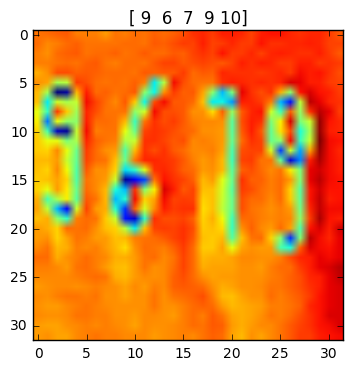

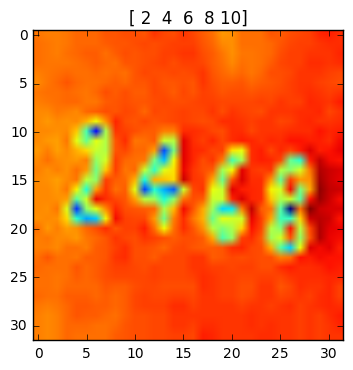

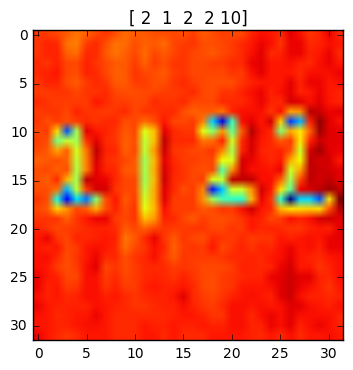

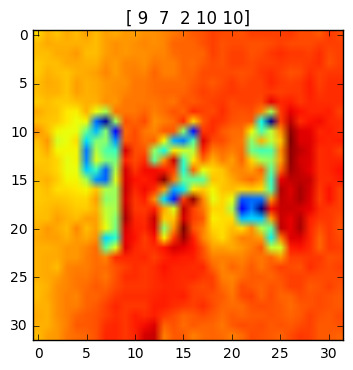

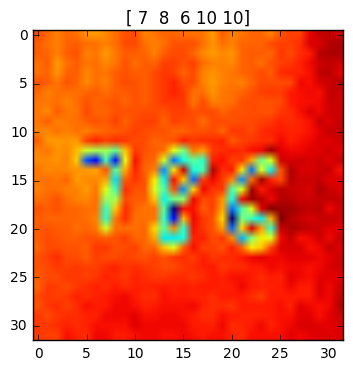

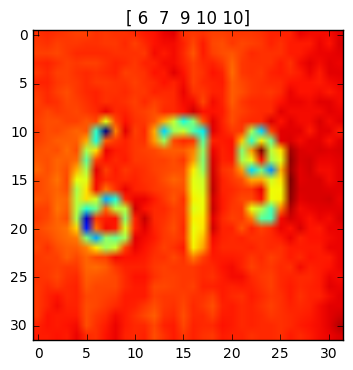

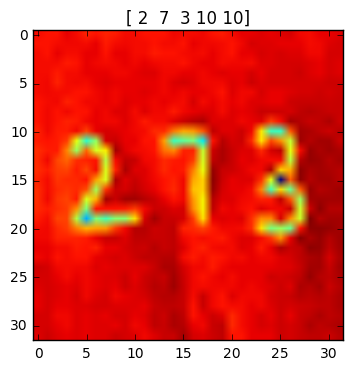

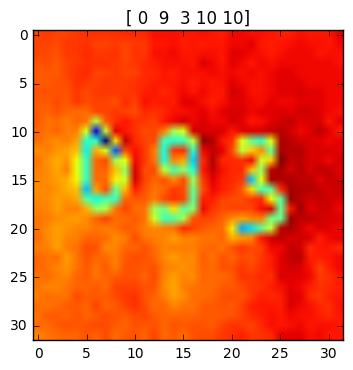

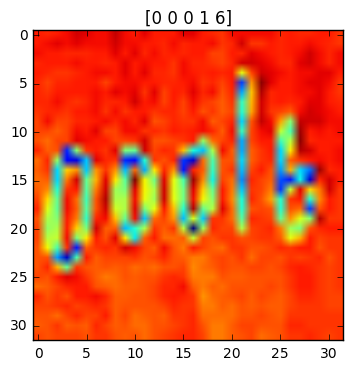

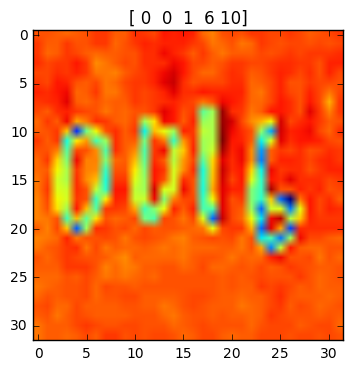

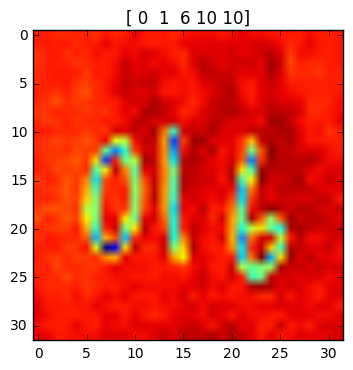

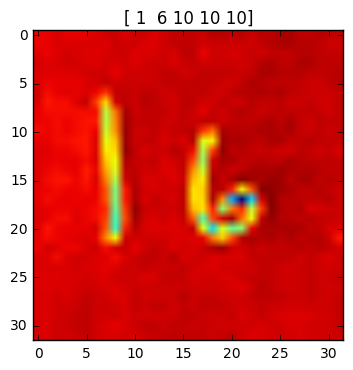

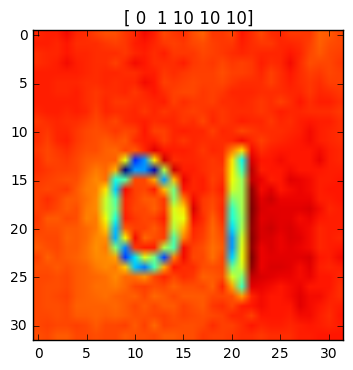

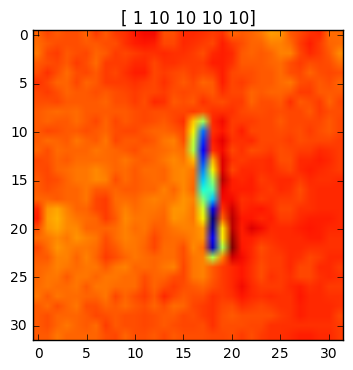

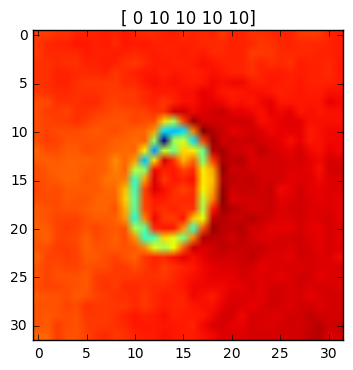

In [164]:
for i in range(len(images_array_)):
    plot_img(images_array_[i,:,:,0], tags[i,1:6])

Model restored.
Initialized
[array([[ 5, 10, 10, 10, 10],
       [ 2,  0,  0, 10, 10],
       [ 6, 10, 10, 10, 10],
       [ 1, 10, 10, 10, 10],
       [ 9, 10, 10, 10, 10],
       [ 1, 10, 10, 10, 10],
       [ 1,  8,  9, 10, 10],
       [ 6,  5, 10, 10, 10],
       [ 1,  4,  4, 10, 10],
       [ 1,  6, 10, 10, 10],
       [ 3,  4, 10, 10, 10],
       [ 2,  0, 10, 10, 10],
       [ 1,  9, 10, 10, 10],
       [ 2,  5, 10, 10, 10],
       [ 4, 10, 10, 10, 10]])]
[[ 5 10 10 10 10]
 [ 2  1  0 10 10]
 [ 6 10 10 10 10]
 [ 1 10 10 10 10]
 [ 9 10 10 10 10]
 [ 1 10 10 10 10]
 [ 1  8  3 10 10]
 [ 6  5 10 10 10]
 [ 1  4  4 10 10]
 [ 1  6 10 10 10]
 [ 3  4 10 10 10]
 [ 2  0 10 10 10]
 [ 1  3 10 10 10]
 [ 2  5 10 10 10]
 [ 4 10 10 10 10]]
    


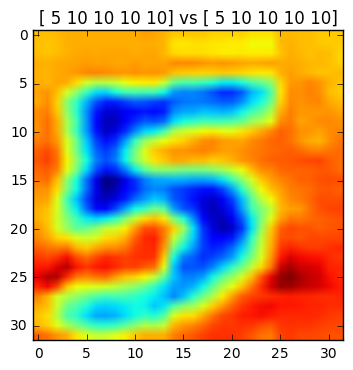

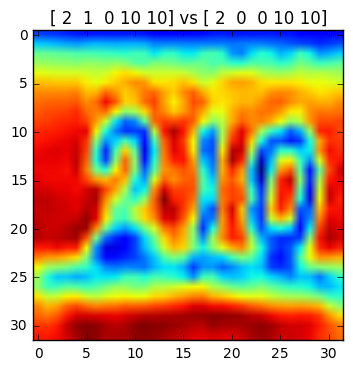

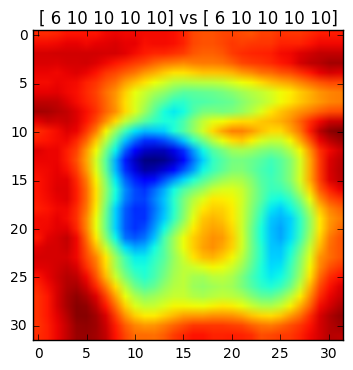

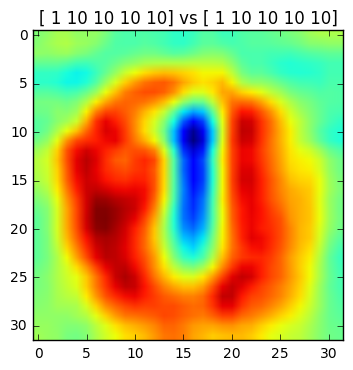

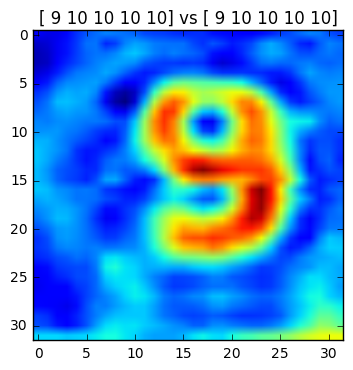

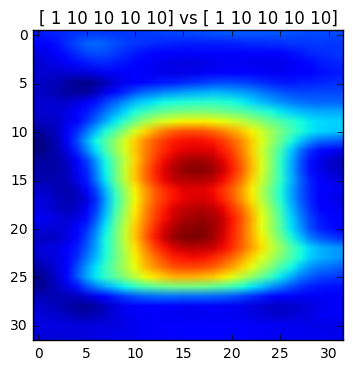

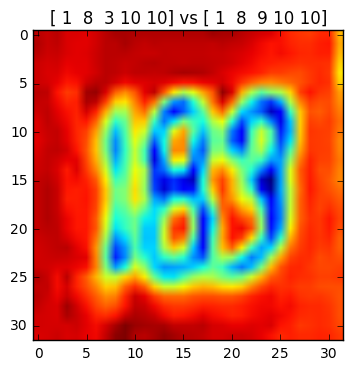

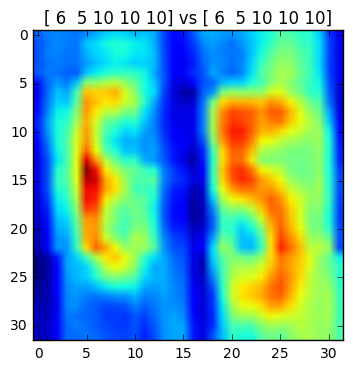

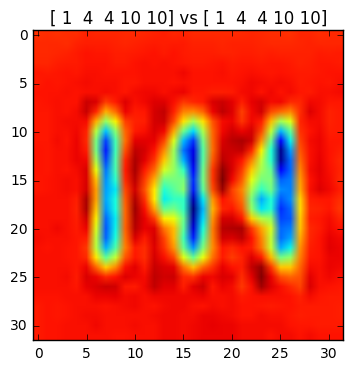

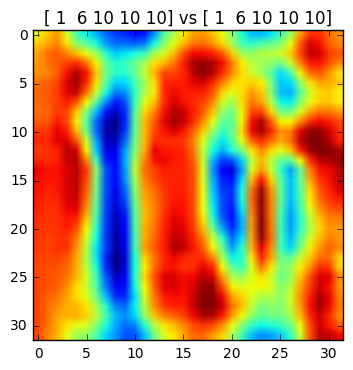

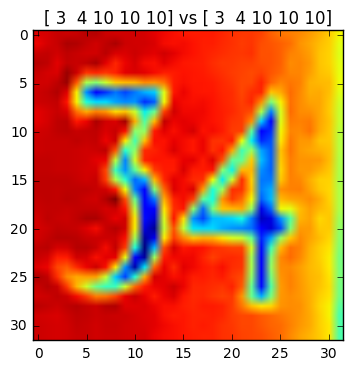

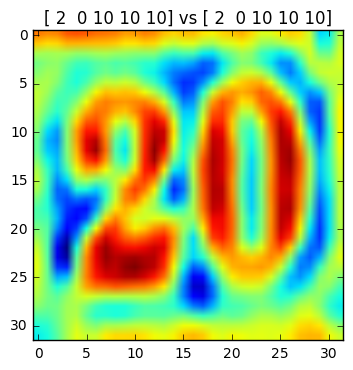

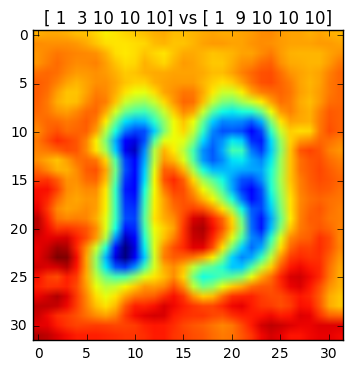

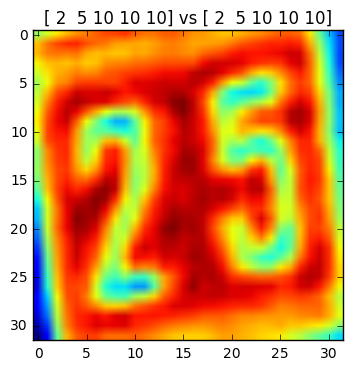

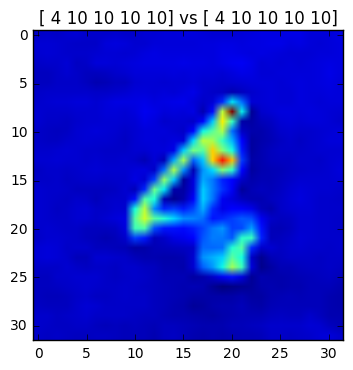

In [163]:
with tf.Session(graph=graphcc) as session:
#     tf.initialize_all_variables().run()
    model_saver.restore(session, "CNN_MNIST_MULTI_2.ckpt")
    print("Model restored.") 
    print('Initialized')
    
    
    predictions = session.run([pred], feed_dict={X : svhn_test_dataset[0:15,:,:,:], Y_ : svhn_test_labels[0:15,:], pkeep : 1.0, alpha : 0.002})
    print(predictions)
    print(svhn_test_labels[0:15,1:6])
    print ('    ')
    for i in range(15):
        label = str(svhn_test_labels[i,1:6]) + ' vs ' + str(predictions[0][i])
        plot_img(svhn_test_dataset[i,:,:,0], label)
#     _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_test_dataset, Y_ : svhn_test_labels, pkeep : 1.0, alpha : 0.002})
#     print('Test accuracy: ', acc(predictions, svhn_test_labels[:,1:6]))
    
#     _, l, predictions = session.run([train_step, cross_entropy, train_prediction], feed_dict={X : svhn_valid_dataset, Y_ : svhn_valid_labels, pkeep : 1.0, alpha : 0.002})
#     print('Validation accuracy: ', acc(predictions, svhn_valid_labels[:,1:6]))